# Generate simulated data for Excel report

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import OrderedDict

%matplotlib inline
np.random.seed(42)

In [2]:
lot_ids = np.arange(0, 1001, 1)

In [3]:
sales_ids = np.arange(0, 201, 1)

In [4]:
base_date = np.datetime64('2018-01-07').astype('datetime64[s]').astype(int)
random_dates = base_date + (np.random.uniform(0, 180, size=10000)*24*3600).astype(int)
random_dates = random_dates.astype('datetime64[s]')

In [5]:
random_dates.sort()

In [6]:
random_dates

array(['2018-01-07T00:03:00', '2018-01-07T00:07:57',
       '2018-01-07T00:13:41', ..., '2018-07-05T21:51:44',
       '2018-07-05T22:05:21', '2018-07-05T22:46:49'],
      dtype='datetime64[s]')

In [7]:
sales_ids = np.arange(1, len(random_dates) + 1, 1)

In [8]:
remakes = np.random.poisson(lam=1.25, size=len(random_dates)//2) + 1

In [9]:
remakes = np.append(remakes, np.random.poisson(lam=0.5, size=len(random_dates)//2) + 1)

In [10]:
lead_times = np.random.standard_normal(len(random_dates))*3600 + 5*3600

In [11]:
(lead_times < 0).sum()

0

In [12]:
lead_times = random_dates + lead_times.astype(int)

In [13]:
manufacturing_time = ((np.random.standard_normal(len(random_dates)) * 3600 * 8 + 50 * 3600) * (remakes * 0.67)).astype(int)

In [14]:
manufacturing_time = lead_times + manufacturing_time

In [15]:
shipping_time = (np.random.standard_normal(len(random_dates)) * 3600*2 + 15 * 3600).astype(int)

In [16]:
shipping_time = shipping_time + manufacturing_time

In [17]:
shipping_time[:5]

array(['2018-01-10T04:13:02', '2018-01-09T03:44:39',
       '2018-01-12T12:06:08', '2018-01-09T06:31:29',
       '2018-01-12T21:24:42'], dtype='datetime64[s]')

In [18]:
pass_rate = 1 / remakes

(array([ 224.,  544., 1472.,    0., 3315.,    0.,    0.,    0.,    0.,
        4445.]),
 array([0.125 , 0.2125, 0.3   , 0.3875, 0.475 , 0.5625, 0.65  , 0.7375,
        0.825 , 0.9125, 1.    ]),
 <a list of 10 Patch objects>)

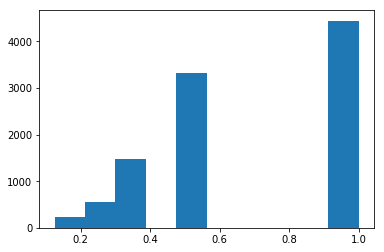

In [19]:
plt.hist(pass_rate)

In [20]:
data = OrderedDict([
    ('sales_order_id', sales_ids),
    ('sales_order_datetime', random_dates),
    ('manufacturing_start_datetime', lead_times),
    ('manufacturing_completed_datetime', manufacturing_time),
    ('shipped_datetime', shipping_time),
    ('attempts', remakes),
    ('pass_rate', pass_rate)
])
df = pd.DataFrame(data)

In [21]:
df.head()

,sales_order_id,sales_order_datetime,manufacturing_start_datetime,manufacturing_completed_datetime,shipped_datetime,attempts,pass_rate
0,1,2018-01-07 00:03:00,2018-01-07 04:09:22,2018-01-09 11:38:29,2018-01-10 04:13:02,2,0.500000
1,2,2018-01-07 00:07:57,2018-01-07 03:58:25,2018-01-08 10:39:03,2018-01-09 03:44:39,1,1.000000
2,3,2018-01-07 00:13:41,2018-01-07 06:44:16,2018-01-11 22:30:43,2018-01-12 12:06:08,3,0.333333
3,4,2018-01-07 00:34:54,2018-01-07 05:50:40,2018-01-08 17:26:05,2018-01-09 06:31:29,1,1.000000
4,5,2018-01-07 00:58:50,2018-01-07 06:33:56,2018-01-12 05:32:17,2018-01-12 21:24:42,5,0.200000


In [22]:
df.tail()

,sales_order_id,sales_order_datetime,manufacturing_start_datetime,manufacturing_completed_datetime,shipped_datetime,attempts,pass_rate
9995,9996,2018-07-05 21:28:02,2018-07-06 04:34:56,2018-07-07 08:46:19,2018-07-07 22:30:55,1,1.0
9996,9997,2018-07-05 21:40:12,2018-07-06 02:17:43,2018-07-07 12:37:38,2018-07-08 07:11:30,1,1.0
9997,9998,2018-07-05 21:51:44,2018-07-06 02:35:17,2018-07-07 11:14:59,2018-07-08 01:51:42,1,1.0
9998,9999,2018-07-05 22:05:21,2018-07-06 02:03:36,2018-07-07 17:46:09,2018-07-08 06:16:54,1,1.0
9999,10000,2018-07-05 22:46:49,2018-07-06 03:53:53,2018-07-07 21:00:28,2018-07-08 13:20:53,1,1.0


In [23]:
df.to_csv('manufacturing_data.csv', index=False)